In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
events = {}

test = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/branchcheck/SIDM_CutDecayFalse_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

In [3]:
events['test'] = test

In [6]:
events

{'test': <NanoEventsArray [<event 1:1:1>, ... <event 1:1:50>] type='370 * event'>}

In [8]:
np.max(events['test'].Jet.pt)

538.0

(array([1.472e+03, 8.000e+00, 0.000e+00, 1.900e+02, 6.400e+01, 0.000e+00,
        1.040e+02, 0.000e+00, 0.000e+00, 3.400e+01, 1.600e+01, 0.000e+00,
        2.500e+01, 4.950e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+01, 0.000e+00, 4.300e+01, 1.430e+02,
        0.000e+00, 5.240e+02, 2.000e+00, 0.000e+00, 3.000e+00, 1.900e+01,
        0.000e+00, 9.300e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.109e+03]),
 array([   0.  ,   40.96,   81.92,  122.88,  163.84,  204.8 ,  245.76,
         286.72,  327.68,  368.64,  409.6 ,  450.56,  491.52,  532.48,
         573.44,  614.4 ,  655.36,  696.32,  737.28,  778.24,  819.2 ,
         860.16,  901.12,  942.08,  983.04, 1024.  , 1064.96, 1105.92,
        1146.88, 1187.84, 1228.8 , 1269.76, 1310.72, 1351.68, 1392.64,
        1433.6 , 1474

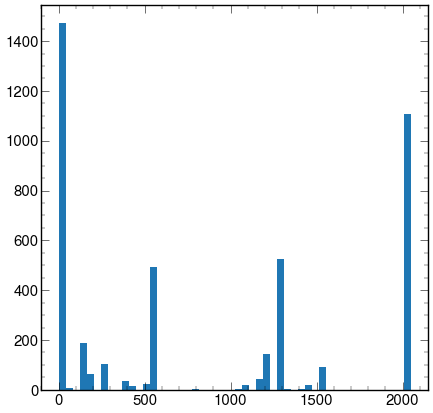

In [14]:
plt.hist(ak.flatten(events['test'].TrigObj.filterBits), range=(0,2048), bins=50)

In [15]:
filterbits = ak.flatten(events['test'].TrigObj.filterBits)

In [17]:
twomu = filterbits[filterbits == 16]

In [18]:
print(twomu)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, ... 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


In [32]:
print([np.binary_repr(i, width=24) for i in ak.flatten(events['test'].TrigObj.filterBits)])

['100000000000', '100000000000', '010011111111', '010011111111', '010010111011', '000011111111', '100000000000', '100000000000', '000000000001', '000000000001', '001000101000', '001000101000', '000000000010', '000000000010', '100000000000', '100000000000', '000010010001', '000010010001', '010011111111', '010011111111', '100000000000', '000000000001', '000000000001', '001000101000', '001000101000', '000000000010', '100000000000', '010111111111', '000110010001', '000110010000', '100000000000', '000000000001', '000000000001', '000000000001', '000000100000', '001000101000', '000000100000', '000000000010', '100000000000', '010010111011', '010110111011', '010110111011', '000010110001', '100000000000', '000000000001', '000000000001', '000000101000', '000000000010', '100000000000', '010010111011', '010010110001', '000010110001', '100000000000', '000000000001', '000000000001', '010011111111', '000011111111', '010011111111', '000010010001', '001000101000', '001000101000', '100000000000', '100000

/tmp/ipykernel_2323/3943004938.py:1: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  print([np.binary_repr(i, width=12) for i in ak.flatten(events['test'].TrigObj.filterBits)])


In [21]:
bin(2048)

'0b100000000000'

In [23]:
import numpy as np

In [ ]:
np.binary_repr